In [12]:
import logging
import matplotlib
import multiprocessing as mp
import sys
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import torch
import torch.backends.cudnn
import torch.utils.data
import torchvision.transforms

import utils.binvox_visualization
import utils.data_loaders
import utils.data_transforms
import utils.network_utils

# Fix problem: no $DISPLAY environment variable
matplotlib.use('Agg')

from argparse import ArgumentParser
from datetime import datetime as dt
from pprint import pprint

from config import cfg
from core.train import train_net
#from core.test import test_net
#from core.inference import inference_net
from core.demo import test_net
from torch.utils.tensorboard import SummaryWriter
import skimage.measure as sm

Use config:
{'CONST': {'BATCH_SIZE': 64,
           'CROP_IMG_H': 128,
           'CROP_IMG_W': 128,
           'DEVICE': '0',
           'IMG_H': 224,
           'IMG_W': 224,
           'N_VIEWS_RENDERING': 1,
           'N_VOX': 32,
           'RNG_SEED': 0,
           'WEIGHTS': './pretrained_models/ckpt-epoch-0350.pth'},
 'DATASET': {'MEAN': [0.5, 0.5, 0.5],
             'STD': [0.5, 0.5, 0.5],
             'TEST_DATASET': 'Inference'},
 'DATASETS': {'INFERENCE': {'RENDERING_PATH': './LargeDatasets/DemoImage/%s/%s/rendering/%02d.png',
                            'TAXONOMY_FILE_PATH': './datasets/DemoData.json'},
              'PASCAL3D': {'ANNOTATION_PATH': '/home/sidroy/software/Pix2Vox/datasets/PASCAL3D/Annotations/%s_imagenet/%s.mat',
                           'RENDERING_PATH': '/home/sidroy/software/Pix2Vox/datasets/PASCAL3D/Images/%s_imagenet/%s.JPEG',
                           'TAXONOMY_FILE_PATH': './datasets/Pascal3D.json',
                           'VOXEL_PATH': '/home

<IPython.core.display.Javascript object>


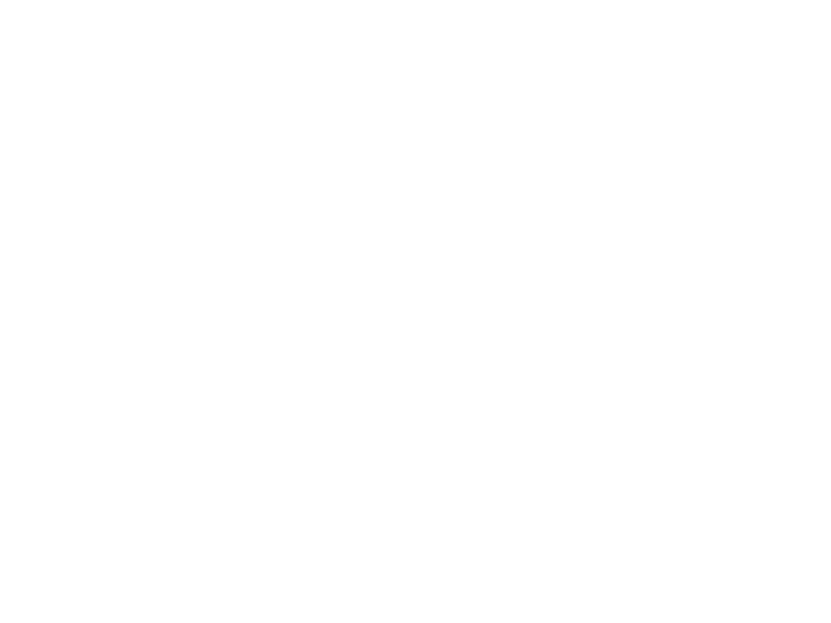

gv shape is (1, 32, 32, 32)


In [41]:
PATH = 'pretrained_models/ckpt-epoch-0350.pth'
torch.backends.cudnn.benchmark = True

checkpoint = (torch.load(PATH))

print('Use config:')
pprint(cfg)

cfg.CONST.WEIGHTS = './pretrained_models/ckpt-epoch-0350.pth'

writer = SummaryWriter('./output/tensorboard')
generated_volume, rendering_images = test_net(cfg,output_dir='./output')

In [39]:
print(generated_volume.shape)
volume = generated_volume.reshape(32,32,32)
print(volume.shape)

(1, 32, 32, 32)
(32, 32, 32)


<IPython.core.display.Javascript object>


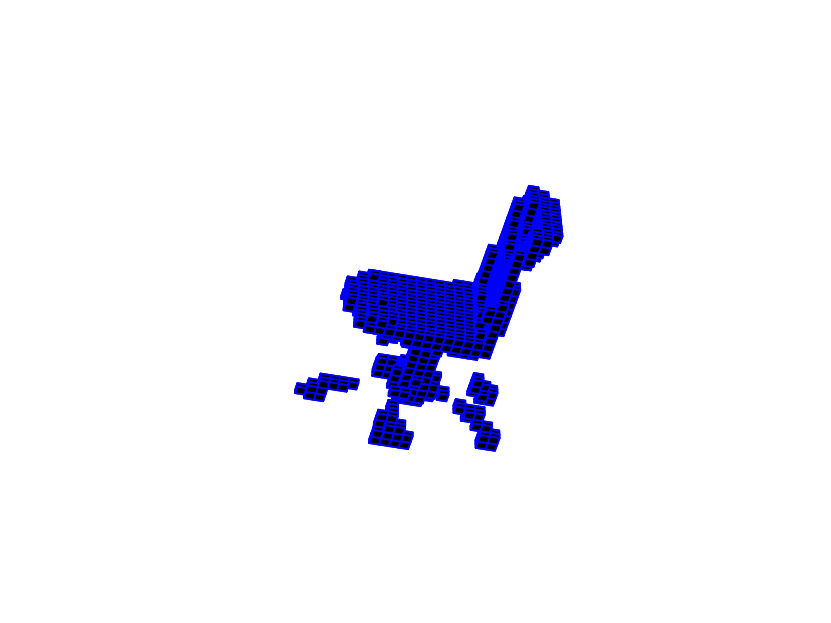

In [10]:
%matplotlib notebook
fig = plt.figure()
ax = fig.gca(projection='3d')
#ax.set_aspect('equal')
volume = volume.squeeze().__ge__(0.5)
ax.voxels(volume, facecolor='k', edgecolor="b")
ax.view_init(30, 240)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.axis('off')
plt.show()
plt.savefig("3D_reco.png", bbox_inches='tight')

<IPython.core.display.Javascript object>


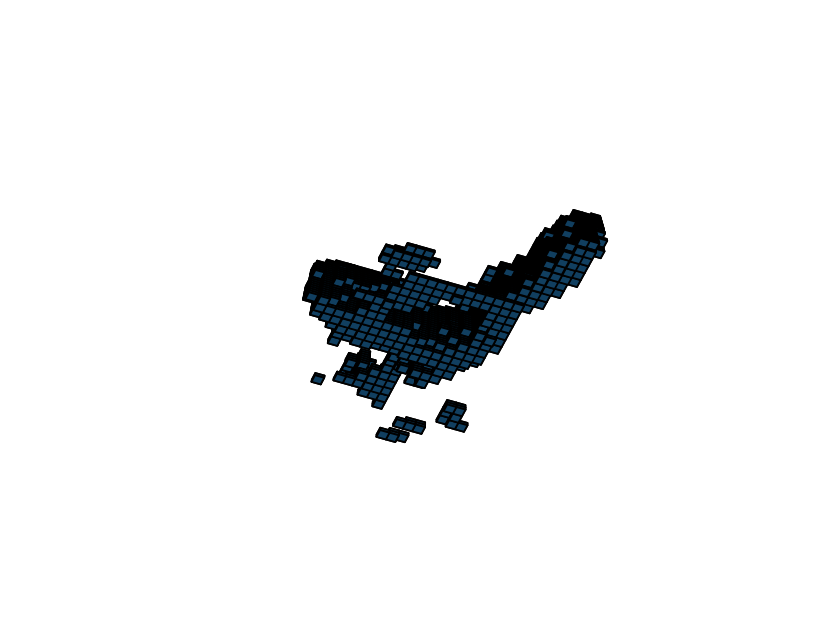

In [4]:
%matplotlib notebook
fig = plt.figure()
ax = fig.gca(projection='3d')
#ax.set_aspect('equal')
volume = volume.squeeze().__ge__(0.5)
ax.voxels(volume, edgecolor="k")
ax.view_init(30, 240)
plt.axis('off')
plt.show()


<IPython.core.display.Javascript object>


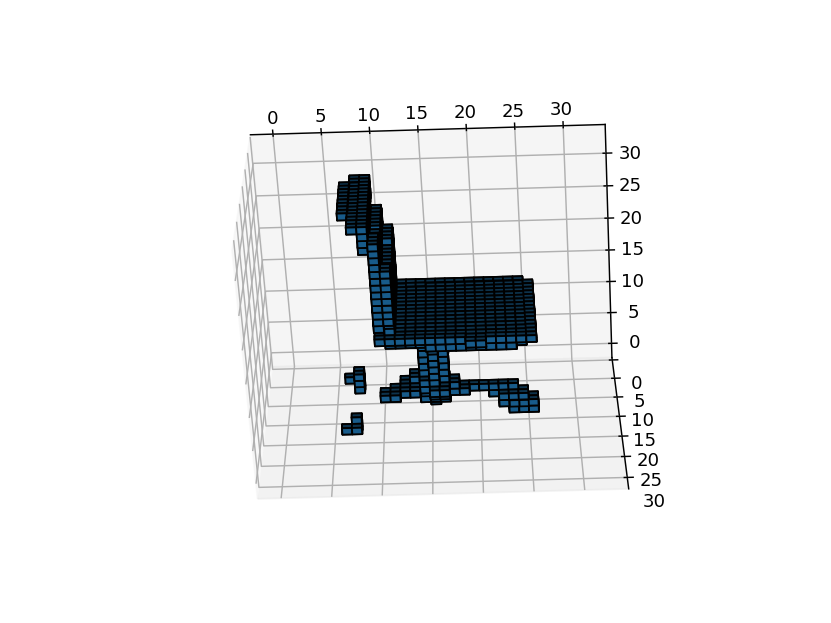

In [3]:
%matplotlib notebook
fig = plt.figure()
ax = fig.gca(projection='3d')
#ax.set_aspect('equal')
volume = volume.squeeze().__ge__(0.5)
ax.voxels(volume, edgecolor="k")
ax.view_init(30, 240)
plt.show()

<IPython.core.display.Javascript object>


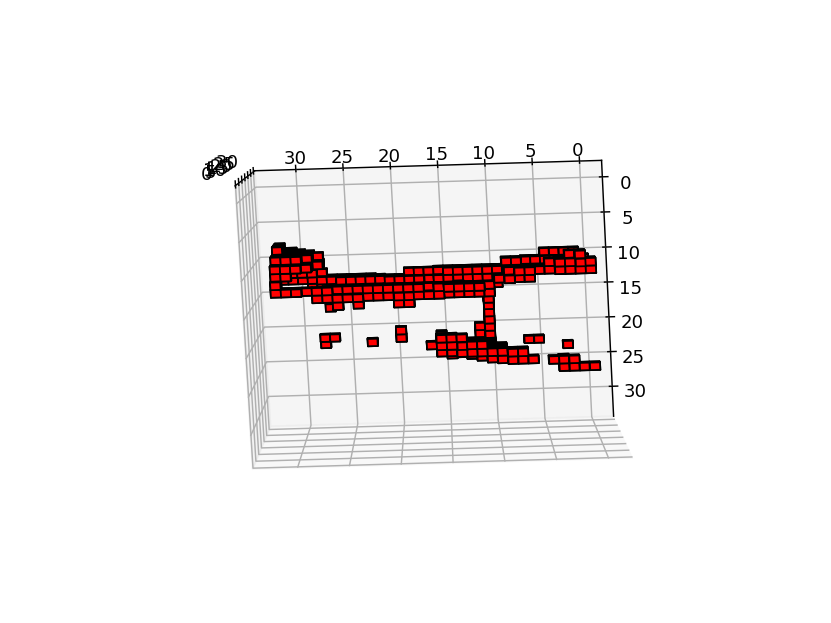

In [34]:
%matplotlib notebook
fig = plt.figure()
ax = fig.gca(projection='3d')
#ax.set_aspect('equal')
volume = volume.squeeze().__ge__(0.3)
ax.voxels(volume, facecolor='r',edgecolor="k")
ax.view_init(30, 240)
plt.show()

<IPython.core.display.Javascript object>


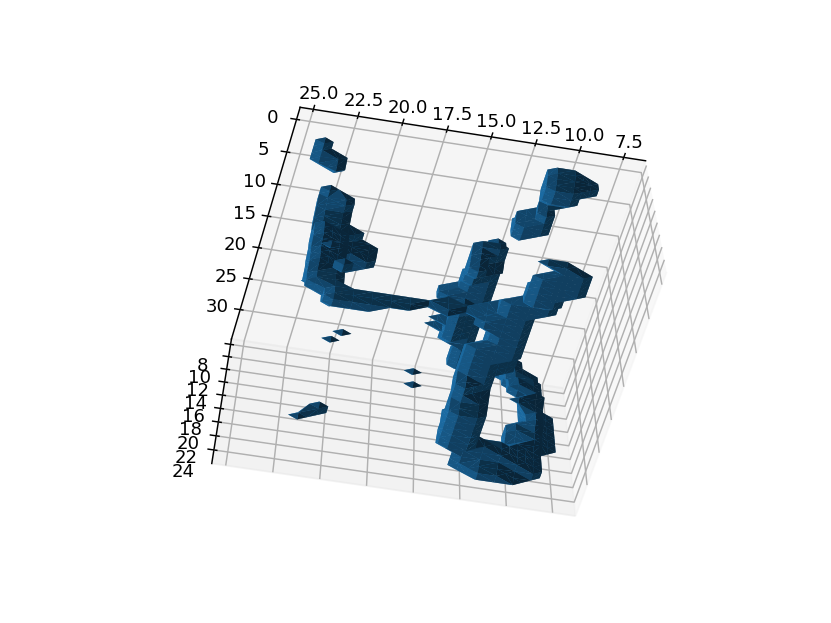

In [35]:
verts, faces = createMesh(volume)

%matplotlib notebook
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:, 2], linewidth=0.2, antialiased=True)

<IPython.core.display.Javascript object>


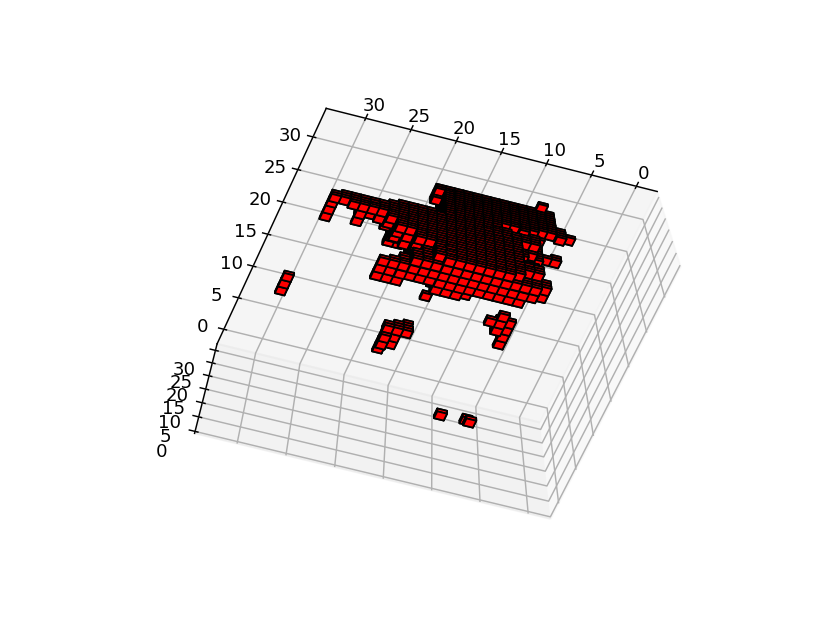

In [42]:
%matplotlib notebook
fig = plt.figure()
ax = fig.gca(projection='3d')
#ax.set_aspect('equal')
volume = volume.squeeze().__ge__(0.3)
ax.voxels(volume, facecolor='r',edgecolor="k")
ax.view_init(30, 240)
plt.show()

<IPython.core.display.Javascript object>


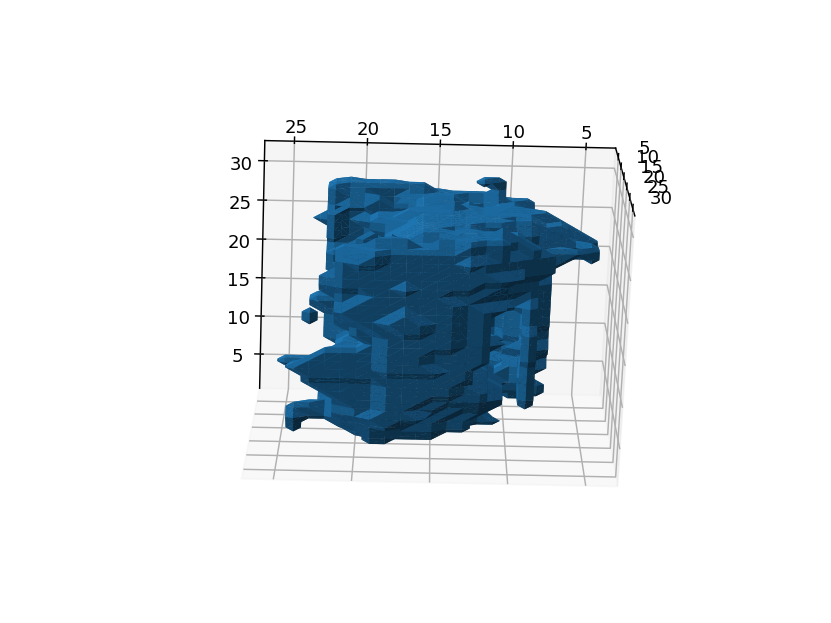

In [26]:
verts, faces = createMesh(volume)

%matplotlib notebook
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:, 2], linewidth=0.2, antialiased=True)

In [15]:
def createMesh(vox, step=1, threshold = 0.5) :   

    vox = np.pad(vox, step)

    verts, faces, normals, values = sm.marching_cubes_lewiner(vox, 0.5, step_size=step)

    return verts, faces

<IPython.core.display.Javascript object>


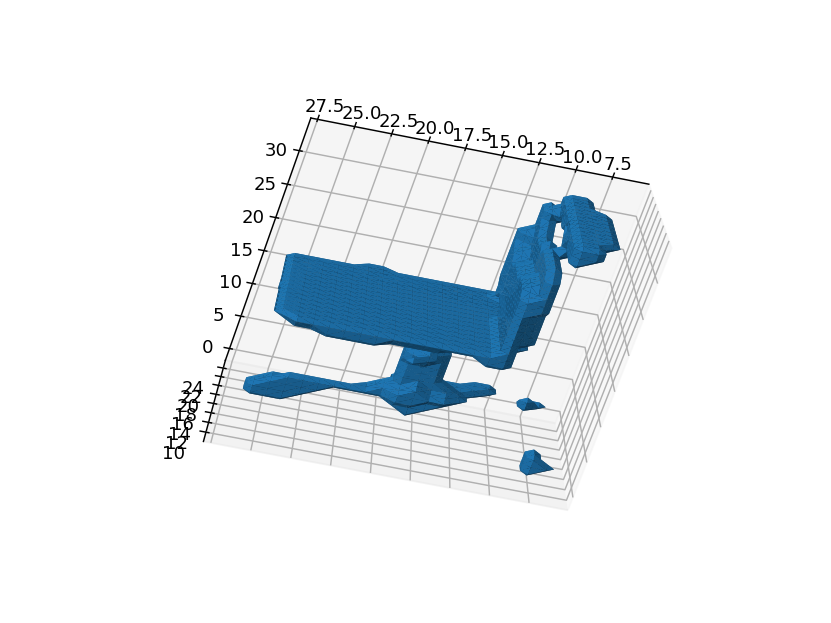

In [22]:
verts, faces = createMesh(volume)

%matplotlib notebook
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:, 2], linewidth=0.2, antialiased=True)